# Udacity Project - Bikesharing Dataset

## Data Wrangling and Data Visualisation

This data set includes information about individual rides made in a bike-sharing system covering the greater Boston area. 

Table of Contents
- Introduction of the dataset and Analysis Plan
- Data Wrangling
- Explonatory Data Analysis
- Explanatory Data Analysis

# Introduction of the dataset and Analysis Plan

**Structure of the dataset**

- I have 12 csv's, for the 12 months of 2020. Ideally, I would like to see all 12 in one dataset, so I can have a wider range in time to draw conclusions from.

- Most of the cvs's have 15 columns with a few having only 14. 
- Need to make sure I'm not missing data so will reduce the ones with 15 rows to 14 before I merge them together. 
- Different months have different amount of entries, but that's normal and I will not manipulate that.

- I will look at the datasets' statistics, datatypes, missing and duplicated values as well as visually assess them to see if there is any need for cleaning.

**Columns**
- **tripduration**: trip duration in seconds
- **starttime**: the time the rental started
- **stoptime**: the time teh rental ended
- **start station id**: where the rental started
- **end station id**: where the rental ended
- **start station latitude**: gps coordinates of start station
- **start station longitude**: gps coordinates of start station
- **end station latitude**: gps coordinates of end station
- **end station longitude**: gps coordinates of end station
- **bikeid**: identificator of the bike used
- **usertype**: if the user has subscription or not


**Insights to explore**

- How long does the average trip takes?
- Which are the most used start and end stations?
- When are the most trips taken in terms of time of day, day of the week, or month of the year?
- Which season is the most popular to ride a bike?
- Does these depend on if a user is a subscriber or customer?

**Features in the dataset the will help support the investigation?**

Trip duration, Start time, End time, Start station, End Station, Usertype


# Data Wrangling


In [1]:
# import libraries 
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Assessment

In [2]:
# load in each month's dataset into a pandas dataframe
df_01 = pandas.read_csv('202001-bluebikes-tripdata.csv')
df_01.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,478,2020-01-01 00:04:05.8090,2020-01-01 00:12:04.2370,366,Broadway T Stop,42.342781,-71.057473,93,JFK/UMass T Stop,42.320340,-71.051180,6005,Customer,1969,0
1,363,2020-01-01 00:04:45.6990,2020-01-01 00:10:49.0400,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3168,Subscriber,2000,1
2,284,2020-01-01 00:06:07.0630,2020-01-01 00:10:51.9240,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3985,Subscriber,2001,1
3,193,2020-01-01 00:06:13.8550,2020-01-01 00:09:27.8320,396,Main St at Beacon St,42.409330,-71.063819,387,Norman St at Kelvin St,42.409859,-71.066319,2692,Subscriber,1978,1
4,428,2020-01-01 00:07:25.2950,2020-01-01 00:14:33.7800,60,Charles Circle - Charles St at Cambridge St,42.360793,-71.071190,49,Stuart St at Charles St,42.351146,-71.066289,4978,Subscriber,1987,1


In [3]:
# assess shape
df_01.shape

(128598, 15)

In [4]:
# assess column names in each data set to see which column is missing
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128598 entries, 0 to 128597
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             128598 non-null  int64  
 1   starttime                128598 non-null  object 
 2   stoptime                 128598 non-null  object 
 3   start station id         128598 non-null  int64  
 4   start station name       128598 non-null  object 
 5   start station latitude   128598 non-null  float64
 6   start station longitude  128598 non-null  float64
 7   end station id           128598 non-null  int64  
 8   end station name         128598 non-null  object 
 9   end station latitude     128598 non-null  float64
 10  end station longitude    128598 non-null  float64
 11  bikeid                   128598 non-null  int64  
 12  usertype                 128598 non-null  object 
 13  birth year               128598 non-null  int64  
 14  gend

In [5]:
df_02 = pandas.read_csv('202002-bluebikes-tripdata.csv')
df_02.shape

(133235, 15)

In [6]:
# assess column names in each data set to see which column is missing
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133235 entries, 0 to 133234
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             133235 non-null  int64  
 1   starttime                133235 non-null  object 
 2   stoptime                 133235 non-null  object 
 3   start station id         133235 non-null  int64  
 4   start station name       133235 non-null  object 
 5   start station latitude   133235 non-null  float64
 6   start station longitude  133235 non-null  float64
 7   end station id           133235 non-null  int64  
 8   end station name         133235 non-null  object 
 9   end station latitude     133235 non-null  float64
 10  end station longitude    133235 non-null  float64
 11  bikeid                   133235 non-null  int64  
 12  usertype                 133235 non-null  object 
 13  birth year               133235 non-null  int64  
 14  gend

In [7]:
df_03 = pandas.read_csv('202003-bluebikes-tripdata.csv')
df_03.shape

(107350, 15)

In [8]:
# assess column names in each data set to see which column is missing
df_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107350 entries, 0 to 107349
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             107350 non-null  int64  
 1   starttime                107350 non-null  object 
 2   stoptime                 107350 non-null  object 
 3   start station id         107350 non-null  int64  
 4   start station name       107350 non-null  object 
 5   start station latitude   107350 non-null  float64
 6   start station longitude  107350 non-null  float64
 7   end station id           107350 non-null  int64  
 8   end station name         107350 non-null  object 
 9   end station latitude     107350 non-null  float64
 10  end station longitude    107350 non-null  float64
 11  bikeid                   107350 non-null  int64  
 12  usertype                 107350 non-null  object 
 13  birth year               107350 non-null  int64  
 14  gend

In [9]:
df_04 = pandas.read_csv('202004-bluebikes-tripdata.csv')
df_04.shape

(46793, 15)

In [10]:
# assess column names in each data set to see which column is missing
df_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46793 entries, 0 to 46792
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             46793 non-null  int64  
 1   starttime                46793 non-null  object 
 2   stoptime                 46793 non-null  object 
 3   start station id         46793 non-null  int64  
 4   start station name       46793 non-null  object 
 5   start station latitude   46793 non-null  float64
 6   start station longitude  46793 non-null  float64
 7   end station id           46793 non-null  int64  
 8   end station name         46793 non-null  object 
 9   end station latitude     46793 non-null  float64
 10  end station longitude    46793 non-null  float64
 11  bikeid                   46793 non-null  int64  
 12  usertype                 46793 non-null  object 
 13  birth year               46793 non-null  int64  
 14  gender                

In [11]:
df_05 = pandas.read_csv('202005-bluebikes-tripdata.csv')
df_05.shape

(124879, 14)

In [12]:
# assess column names in each data set to see which column is missing
df_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124879 entries, 0 to 124878
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             124879 non-null  int64  
 1   starttime                124879 non-null  object 
 2   stoptime                 124879 non-null  object 
 3   start station id         124879 non-null  int64  
 4   start station name       124879 non-null  object 
 5   start station latitude   124879 non-null  float64
 6   start station longitude  124879 non-null  float64
 7   end station id           124879 non-null  int64  
 8   end station name         124879 non-null  object 
 9   end station latitude     124879 non-null  float64
 10  end station longitude    124879 non-null  float64
 11  bikeid                   124879 non-null  int64  
 12  usertype                 124879 non-null  object 
 13  postal code              110498 non-null  object 
dtypes: f

In [13]:
df_06 = pandas.read_csv('202006-bluebikes-tripdata.csv')
df_06.shape

(191843, 14)

In [14]:
# assess column names in each data set to see which column is missing
df_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191843 entries, 0 to 191842
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             191843 non-null  int64  
 1   starttime                191843 non-null  object 
 2   stoptime                 191843 non-null  object 
 3   start station id         191843 non-null  int64  
 4   start station name       191843 non-null  object 
 5   start station latitude   191843 non-null  float64
 6   start station longitude  191843 non-null  float64
 7   end station id           191843 non-null  int64  
 8   end station name         191843 non-null  object 
 9   end station latitude     191843 non-null  float64
 10  end station longitude    191843 non-null  float64
 11  bikeid                   191843 non-null  int64  
 12  usertype                 191843 non-null  object 
 13  postal code              170883 non-null  object 
dtypes: f

In [15]:
df_07 = pandas.read_csv('202007-bluebikes-tripdata.csv')
df_07.shape

(259726, 14)

In [16]:
# assess column names in each data set to see which column is missing
df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259726 entries, 0 to 259725
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             259726 non-null  int64  
 1   starttime                259726 non-null  object 
 2   stoptime                 259726 non-null  object 
 3   start station id         259726 non-null  int64  
 4   start station name       259726 non-null  object 
 5   start station latitude   259726 non-null  float64
 6   start station longitude  259726 non-null  float64
 7   end station id           259726 non-null  int64  
 8   end station name         259726 non-null  object 
 9   end station latitude     259726 non-null  float64
 10  end station longitude    259726 non-null  float64
 11  bikeid                   259726 non-null  int64  
 12  usertype                 259726 non-null  object 
 13  postal code              230479 non-null  object 
dtypes: f

In [17]:
df_08 = pandas.read_csv('202008-bluebikes-tripdata.csv')
df_08.shape

(289033, 14)

In [18]:
# assess column names in each data set to see which column is missing
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289033 entries, 0 to 289032
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             289033 non-null  int64  
 1   starttime                289033 non-null  object 
 2   stoptime                 289033 non-null  object 
 3   start station id         289033 non-null  int64  
 4   start station name       289033 non-null  object 
 5   start station latitude   289033 non-null  float64
 6   start station longitude  289033 non-null  float64
 7   end station id           289033 non-null  int64  
 8   end station name         289033 non-null  object 
 9   end station latitude     289033 non-null  float64
 10  end station longitude    289033 non-null  float64
 11  bikeid                   289033 non-null  int64  
 12  usertype                 289033 non-null  object 
 13  postal code              264273 non-null  object 
dtypes: f

In [19]:
df_09 = pandas.read_csv('202009-bluebikes-tripdata.csv')
df_09.shape

(307853, 14)

In [20]:
# assess column names in each data set to see which column is missing
df_09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307853 entries, 0 to 307852
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             307853 non-null  int64  
 1   starttime                307853 non-null  object 
 2   stoptime                 307853 non-null  object 
 3   start station id         307853 non-null  int64  
 4   start station name       307853 non-null  object 
 5   start station latitude   307853 non-null  float64
 6   start station longitude  307853 non-null  float64
 7   end station id           307853 non-null  int64  
 8   end station name         307853 non-null  object 
 9   end station latitude     307853 non-null  float64
 10  end station longitude    307853 non-null  float64
 11  bikeid                   307853 non-null  int64  
 12  usertype                 307853 non-null  object 
 13  postal code              284701 non-null  object 
dtypes: f

In [21]:
df_10 = pandas.read_csv('202010-bluebikes-tripdata.csv')
df_10.shape

(248424, 14)

In [22]:
# assess column names in each data set to see which column is missing
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248424 entries, 0 to 248423
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             248424 non-null  int64  
 1   starttime                248424 non-null  object 
 2   stoptime                 248424 non-null  object 
 3   start station id         248424 non-null  int64  
 4   start station name       248424 non-null  object 
 5   start station latitude   248424 non-null  float64
 6   start station longitude  248424 non-null  float64
 7   end station id           248424 non-null  int64  
 8   end station name         248424 non-null  object 
 9   end station latitude     248424 non-null  float64
 10  end station longitude    248424 non-null  float64
 11  bikeid                   248424 non-null  int64  
 12  usertype                 248424 non-null  object 
 13  postal code              230070 non-null  object 
dtypes: f

In [23]:
df_11 = pandas.read_csv('202011-bluebikes-tripdata.csv')
df_11.shape

(161712, 14)

In [24]:
# assess column names in each data set to see which column is missing
df_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161712 entries, 0 to 161711
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             161712 non-null  int64  
 1   starttime                161712 non-null  object 
 2   stoptime                 161712 non-null  object 
 3   start station id         161712 non-null  int64  
 4   start station name       161712 non-null  object 
 5   start station latitude   161712 non-null  float64
 6   start station longitude  161712 non-null  float64
 7   end station id           161712 non-null  int64  
 8   end station name         161712 non-null  object 
 9   end station latitude     161712 non-null  float64
 10  end station longitude    161712 non-null  float64
 11  bikeid                   161712 non-null  int64  
 12  usertype                 161712 non-null  object 
 13  postal code              151233 non-null  object 
dtypes: f

In [25]:
df_12 = pandas.read_csv('202012-bluebikes-tripdata.csv')
df_12.shape

(74002, 14)

In [26]:
# assess column names in each data set to see which column is missing
df_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74002 entries, 0 to 74001
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             74002 non-null  int64  
 1   starttime                74002 non-null  object 
 2   stoptime                 74002 non-null  object 
 3   start station id         74002 non-null  int64  
 4   start station name       74002 non-null  object 
 5   start station latitude   74002 non-null  float64
 6   start station longitude  74002 non-null  float64
 7   end station id           74002 non-null  int64  
 8   end station name         74002 non-null  object 
 9   end station latitude     74002 non-null  float64
 10  end station longitude    74002 non-null  float64
 11  bikeid                   74002 non-null  int64  
 12  usertype                 74002 non-null  object 
 13  postal code              71109 non-null  object 
dtypes: float64(4), int64(4

### Summary of Assessment

### Quality Issues
*All datasets*
- `starttime` and `stopttime` column is in object format, it should be datetime

### Tidiness Issues

- merge datasets (concat)
- remove birthyear, postcalcode and gender columns as it only has partial month's data coverage, not the full year

I have to state here, that I haven't gone through all the assessment like checking for missing values, etc. I would like to do that after merging the datasets together as it will be a lot easier like that so I assume that there will be a Cleaning Part 2 upon succeeding to merge the datasets together.



## Cleaning dataset

### Define 
- merge datasets (concat)

Action: find best method to merge datasets

### Code

In [27]:
# make a copy of all datasets to be sure I can revert if things go wrong
df_01_copy = df_01.copy()
df_02_copy = df_02.copy()
df_03_copy = df_03.copy()
df_04_copy = df_04.copy()
df_05_copy = df_05.copy()
df_06_copy = df_06.copy()
df_07_copy = df_07.copy()
df_08_copy = df_08.copy()
df_09_copy = df_09.copy()
df_10_copy = df_10.copy()
df_11_copy = df_11.copy()
df_12_copy = df_12.copy()

Check each copied datasets shape so I can see if I got all the data after merging

In [28]:
df_01_copy.shape

(128598, 15)

In [29]:
df_02_copy.shape

(133235, 15)

In [30]:
df_03_copy.shape

(107350, 15)

In [31]:
df_04_copy.shape

(46793, 15)

In [32]:
df_05_copy.shape

(124879, 14)

In [33]:
df_06_copy.shape

(191843, 14)

In [34]:
df_07_copy.shape

(259726, 14)

In [35]:
df_08_copy.shape

(289033, 14)

In [36]:
df_09_copy.shape

(307853, 14)

In [37]:
df_10_copy.shape

(248424, 14)

In [38]:
df_11_copy.shape

(161712, 14)

In [39]:
df_12_copy.shape

(74002, 14)

Check if copies have the right columns

In [40]:
df_01_copy.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,478,2020-01-01 00:04:05.8090,2020-01-01 00:12:04.2370,366,Broadway T Stop,42.342781,-71.057473,93,JFK/UMass T Stop,42.320340,-71.051180,6005,Customer,1969,0
1,363,2020-01-01 00:04:45.6990,2020-01-01 00:10:49.0400,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3168,Subscriber,2000,1
2,284,2020-01-01 00:06:07.0630,2020-01-01 00:10:51.9240,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3985,Subscriber,2001,1
3,193,2020-01-01 00:06:13.8550,2020-01-01 00:09:27.8320,396,Main St at Beacon St,42.409330,-71.063819,387,Norman St at Kelvin St,42.409859,-71.066319,2692,Subscriber,1978,1
4,428,2020-01-01 00:07:25.2950,2020-01-01 00:14:33.7800,60,Charles Circle - Charles St at Cambridge St,42.360793,-71.071190,49,Stuart St at Charles St,42.351146,-71.066289,4978,Subscriber,1987,1


In [41]:
df_06_copy.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
0,1160,2020-06-01 00:00:25.6240,2020-06-01 00:19:45.7010,192,Purchase St at Pearl St,42.354659,-71.053181,366,Broadway T Stop,42.342781,-71.057473,2831,Customer,NaN
1,1419,2020-06-01 00:01:09.3800,2020-06-01 00:24:48.9520,355,Bennington St at Constitution Beach,42.385224,-71.010631,355,Bennington St at Constitution Beach,42.385224,-71.010631,5696,Customer,02128
2,1093,2020-06-01 00:01:29.4790,2020-06-01 00:19:43.3530,131,Jackson Square T Stop,42.322931,-71.100141,331,Huntington Ave at Mass Art,42.336586,-71.098870,3922,Subscriber,10570
3,1067,2020-06-01 00:01:35.8540,2020-06-01 00:19:23.3250,131,Jackson Square T Stop,42.322931,-71.100141,331,Huntington Ave at Mass Art,42.336586,-71.098870,3361,Subscriber,10570
4,1391,2020-06-01 00:01:51.0390,2020-06-01 00:25:02.8460,355,Bennington St at Constitution Beach,42.385224,-71.010631,355,Bennington St at Constitution Beach,42.385224,-71.010631,3621,Customer,01902


In [42]:
# concat the data sets
df_concatenated_columns_all = pandas.concat([df_01_copy, df_02_copy, df_03_copy, df_04_copy, df_05_copy, df_06_copy, df_07_copy, df_08_copy, df_09_copy, df_10_copy, df_11_copy, df_12_copy,])


### Test

In [43]:
df_concatenated_columns_all.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,postal code
0,478,2020-01-01 00:04:05.8090,2020-01-01 00:12:04.2370,366,Broadway T Stop,42.342781,-71.057473,93,JFK/UMass T Stop,42.320340,-71.051180,6005,Customer,1969.0,0.0,NaN
1,363,2020-01-01 00:04:45.6990,2020-01-01 00:10:49.0400,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3168,Subscriber,2000.0,1.0,NaN
2,284,2020-01-01 00:06:07.0630,2020-01-01 00:10:51.9240,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3985,Subscriber,2001.0,1.0,NaN
3,193,2020-01-01 00:06:13.8550,2020-01-01 00:09:27.8320,396,Main St at Beacon St,42.409330,-71.063819,387,Norman St at Kelvin St,42.409859,-71.066319,2692,Subscriber,1978.0,1.0,NaN
4,428,2020-01-01 00:07:25.2950,2020-01-01 00:14:33.7800,60,Charles Circle - Charles St at Cambridge St,42.360793,-71.071190,49,Stuart St at Charles St,42.351146,-71.066289,4978,Subscriber,1987.0,1.0,NaN


In [44]:
df_concatenated_columns_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073448 entries, 0 to 74001
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   float64
 15  postal code              object 
dtypes: float64(6), int64(4), object(6)
memory usage: 268.9+ MB


In [45]:
df_concatenated_columns_all.shape

(2073448, 16)

In [46]:
df_all = df_concatenated_columns_all.copy()

In [47]:
df_all.shape


(2073448, 16)

### Define
- remove birth year, gender and postal code columns

Action: 
drop these columns permanently

### Code

In [48]:
df_all.drop(['birth year', 'postal code', 'gender'], axis=1, inplace=True)

### Test

In [49]:
df_all.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype
0,478,2020-01-01 00:04:05.8090,2020-01-01 00:12:04.2370,366,Broadway T Stop,42.342781,-71.057473,93,JFK/UMass T Stop,42.320340,-71.051180,6005,Customer
1,363,2020-01-01 00:04:45.6990,2020-01-01 00:10:49.0400,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3168,Subscriber
2,284,2020-01-01 00:06:07.0630,2020-01-01 00:10:51.9240,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3985,Subscriber
3,193,2020-01-01 00:06:13.8550,2020-01-01 00:09:27.8320,396,Main St at Beacon St,42.409330,-71.063819,387,Norman St at Kelvin St,42.409859,-71.066319,2692,Subscriber
4,428,2020-01-01 00:07:25.2950,2020-01-01 00:14:33.7800,60,Charles Circle - Charles St at Cambridge St,42.360793,-71.071190,49,Stuart St at Charles St,42.351146,-71.066289,4978,Subscriber


### Define
- `starttime` and `stopttime` column is in object format, it should be datetime

Action: convert these to datetime

### Code

In [50]:
# convert starttime field into datetime
df_all['starttime'] = pandas.to_datetime(df_all['starttime'])

In [51]:
# convert stoptime field into datetime
df_all['stoptime'] = pandas.to_datetime(df_all['stoptime'])

### Test

In [52]:
df_all.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
dtype: object

## Cleaning part 2

Let's first check if there are any outliers in the data.

In [53]:
# assess df_all statistics
df_all.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid
count,2.073448e+06,2.073448e+06,2.073448e+06,2.073448e+06,2.073448e+06,2.073448e+06,2.073448e+06,2.073448e+06
mean,1.831438e+03,1.634481e+02,4.235597e+01,-7.108868e+01,1.623836e+02,4.235589e+01,-7.108840e+01,4.263332e+03
std,2.425891e+04,1.357767e+02,3.452189e-02,5.628081e-02,1.358793e+02,3.455072e-02,5.626398e-02,1.272965e+03
min,6.100000e+01,1.000000e+00,0.000000e+00,-7.122627e+01,1.000000e+00,0.000000e+00,-7.122627e+01,3.100000e+01
25%,4.750000e+02,5.500000e+01,4.234522e+01,-7.110594e+01,5.500000e+01,4.234522e+01,-7.110567e+01,3.175000e+03
50%,8.280000e+02,1.100000e+02,4.235560e+01,-7.108981e+01,1.080000e+02,4.235560e+01,-7.108822e+01,4.256000e+03
75%,1.443000e+03,2.390000e+02,4.236567e+01,-7.106959e+01,2.390000e+02,4.236567e+01,-7.106894e+01,5.406000e+03
max,3.879352e+06,4.990000e+02,4.241608e+01,0.000000e+00,4.990000e+02,4.241608e+01,0.000000e+00,6.724000e+03


There must be some zero values in the start latitude and end latitude columns, but since I'm not going to explore the data in those columns, I will not clean the data there.

In [54]:
# assess df_all's duplicated values
sum(df_all.duplicated())

0

In [55]:
# assess df_all's null values
df_all.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
dtype: int64

It seems like the data set is clean enough to start my exploration towards the initial questions, but to be able to draw conclusions from the starttime column, I would like to extract a couple of values and create new columns.

Q: When are the most trips taken in terms of time of day, day of the week, or month of the year?
 
 ### Tidiness Issues

There is no way to see
- which day of the week the data was recorded
- if the day is a weekday or a weekend
- which months of the year the data was recorded
- which time of the day the data was recorded



### Define 
There is no way to see which day of the week the data was recorded

Action:
- Create a column for the days of the week 
- Convert values to date time and then to week day names



### Code

In [56]:
# create a column for the days of the week using the starttime column

df_all['weekday'] = df_all['starttime'].dt.dayofweek   


### Test

In [57]:
df_all.head(161550)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,weekday
0,478,2020-01-01 00:04:05.809,2020-01-01 00:12:04.237,366,Broadway T Stop,42.342781,-71.057473,93,JFK/UMass T Stop,42.320340,-71.051180,6005,Customer,2
1,363,2020-01-01 00:04:45.699,2020-01-01 00:10:49.040,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3168,Subscriber,2
2,284,2020-01-01 00:06:07.063,2020-01-01 00:10:51.924,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3985,Subscriber,2
3,193,2020-01-01 00:06:13.855,2020-01-01 00:09:27.832,396,Main St at Beacon St,42.409330,-71.063819,387,Norman St at Kelvin St,42.409859,-71.066319,2692,Subscriber,2
4,428,2020-01-01 00:07:25.295,2020-01-01 00:14:33.780,60,Charles Circle - Charles St at Cambridge St,42.360793,-71.071190,49,Stuart St at Charles St,42.351146,-71.066289,4978,Subscriber,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32947,130,2020-02-08 07:26:10.301,2020-02-08 07:28:21.117,195,Child St at North St,42.371505,-71.072493,90,Lechmere Station at Cambridge St / First St,42.370677,-71.076529,3844,Subscriber,5
32948,157,2020-02-08 07:27:17.874,2020-02-08 07:29:54.959,116,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412,76,Central Sq Post Office / Cambridge City Hall a...,42.366426,-71.105495,3684,Subscriber,5
32949,629,2020-02-08 07:28:25.079,2020-02-08 07:38:54.861,118,Linear Park - Mass. Ave. at Cameron Ave.,42.397828,-71.130516,115,Porter Square Station,42.387995,-71.119084,4985,Subscriber,5
32950,525,2020-02-08 07:29:50.489,2020-02-08 07:38:35.699,407,Craigie at Summer St,42.383634,-71.108558,328,Grove St at Community Path,42.396387,-71.120113,5624,Subscriber,5


### Define 
There is no way to see which day of the month the data was recorded

Action:
- Create a column for the months of the year
- Convert values to date time and then to month names

### Code

In [58]:
# create a column for the months of the year using the starttime column
df_all['month'] = pandas.DatetimeIndex(df_all['starttime']).month

# convert values to date time and then month names

df_all['month'] = pandas.to_datetime(df_all['month'], format='%m').dt.month_name()


### Test

In [59]:
df_all.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,weekday,month
0,478,2020-01-01 00:04:05.809,2020-01-01 00:12:04.237,366,Broadway T Stop,42.342781,-71.057473,93,JFK/UMass T Stop,42.320340,-71.051180,6005,Customer,2,January
1,363,2020-01-01 00:04:45.699,2020-01-01 00:10:49.040,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3168,Subscriber,2,January
2,284,2020-01-01 00:06:07.063,2020-01-01 00:10:51.924,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3985,Subscriber,2,January
3,193,2020-01-01 00:06:13.855,2020-01-01 00:09:27.832,396,Main St at Beacon St,42.409330,-71.063819,387,Norman St at Kelvin St,42.409859,-71.066319,2692,Subscriber,2,January
4,428,2020-01-01 00:07:25.295,2020-01-01 00:14:33.780,60,Charles Circle - Charles St at Cambridge St,42.360793,-71.071190,49,Stuart St at Charles St,42.351146,-71.066289,4978,Subscriber,2,January


### Define 
There is no way to see which time of the day the data was recorded

Action:
- Create a column for the time of the day


### Code

In [60]:
# create a column for the time of the day using the starttime column
df_all['timeoftheday']= df_all['starttime'].dt.strftime('%H:%M')

### Test

In [61]:
df_all.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,weekday,month,timeoftheday
0,478,2020-01-01 00:04:05.809,2020-01-01 00:12:04.237,366,Broadway T Stop,42.342781,-71.057473,93,JFK/UMass T Stop,42.320340,-71.051180,6005,Customer,2,January,00:04
1,363,2020-01-01 00:04:45.699,2020-01-01 00:10:49.040,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3168,Subscriber,2,January,00:04
2,284,2020-01-01 00:06:07.063,2020-01-01 00:10:51.924,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3985,Subscriber,2,January,00:06
3,193,2020-01-01 00:06:13.855,2020-01-01 00:09:27.832,396,Main St at Beacon St,42.409330,-71.063819,387,Norman St at Kelvin St,42.409859,-71.066319,2692,Subscriber,2,January,00:06
4,428,2020-01-01 00:07:25.295,2020-01-01 00:14:33.780,60,Charles Circle - Charles St at Cambridge St,42.360793,-71.071190,49,Stuart St at Charles St,42.351146,-71.066289,4978,Subscriber,2,January,00:07


### Define 
There is no way to see if the day of the week is a weekday or a weekend

Action:
- Create a column to state if it's a weekday or weekend

### Code

In [62]:
df_all['type'] = df_all.starttime.dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

### Test

In [63]:
df_all.head(161550)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,weekday,month,timeoftheday,type
0,478,2020-01-01 00:04:05.809,2020-01-01 00:12:04.237,366,Broadway T Stop,42.342781,-71.057473,93,JFK/UMass T Stop,42.320340,-71.051180,6005,Customer,2,January,00:04,Weekday
1,363,2020-01-01 00:04:45.699,2020-01-01 00:10:49.040,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3168,Subscriber,2,January,00:04,Weekday
2,284,2020-01-01 00:06:07.063,2020-01-01 00:10:51.924,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3985,Subscriber,2,January,00:06,Weekday
3,193,2020-01-01 00:06:13.855,2020-01-01 00:09:27.832,396,Main St at Beacon St,42.409330,-71.063819,387,Norman St at Kelvin St,42.409859,-71.066319,2692,Subscriber,2,January,00:06,Weekday
4,428,2020-01-01 00:07:25.295,2020-01-01 00:14:33.780,60,Charles Circle - Charles St at Cambridge St,42.360793,-71.071190,49,Stuart St at Charles St,42.351146,-71.066289,4978,Subscriber,2,January,00:07,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32947,130,2020-02-08 07:26:10.301,2020-02-08 07:28:21.117,195,Child St at North St,42.371505,-71.072493,90,Lechmere Station at Cambridge St / First St,42.370677,-71.076529,3844,Subscriber,5,February,07:26,Weekend
32948,157,2020-02-08 07:27:17.874,2020-02-08 07:29:54.959,116,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412,76,Central Sq Post Office / Cambridge City Hall a...,42.366426,-71.105495,3684,Subscriber,5,February,07:27,Weekend
32949,629,2020-02-08 07:28:25.079,2020-02-08 07:38:54.861,118,Linear Park - Mass. Ave. at Cameron Ave.,42.397828,-71.130516,115,Porter Square Station,42.387995,-71.119084,4985,Subscriber,5,February,07:28,Weekend
32950,525,2020-02-08 07:29:50.489,2020-02-08 07:38:35.699,407,Craigie at Summer St,42.383634,-71.108558,328,Grove St at Community Path,42.396387,-71.120113,5624,Subscriber,5,February,07:29,Weekend


In [64]:
df_all.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
weekday                             int64
month                              object
timeoftheday                       object
type                               object
dtype: object

## Explore Univariate Variables

In this section, I'll investigate distributions of individual variables. My aim is to check if there are any unusual points or outliers, take a deeper look to clean things up and prepare myself to look at relationships between variables.

I will look into the following:
- How long does the average trip take?
- Which are the most used start and end stations?
- When are the most trips taken in terms of time of day, day of the week, or month of the year?



In [65]:
# asses how long does the average trip take
df_all['tripduration'].mean()

1831.438460477427

The average trip takes 1831 seconds, which is approx. 30 minutes. I would like to see how the most frequent trip durations and the min and max value compare to the average.

In [66]:
# assess trip duration column's 15 most frequent values in descending order
df_all['tripduration'].value_counts().sort_values(ascending=False)[:15]


397    1897
382    1884
410    1879
399    1878
366    1873
376    1871
361    1866
391    1865
393    1863
380    1857
360    1857
352    1853
405    1851
368    1850
346    1847
Name: tripduration, dtype: int64

The most frequent trip duration shows values between 1847 and 1897 seconds which is around 30 minutes as well.

In [67]:
df_all['tripduration'].min()

61

In [68]:
df_all['tripduration'].max()

3879352

It seems like both minimum and maximum values are mistakes done by the users, either they didn't ride the bike just started the rental (minimum duration is around 1 minute) or they left the bike without closing the rental (maximum duration is 64655 minutes).

Next, I will investigate the most frequently used start and end stations.

In [69]:
# assess start station id column's 12 most frequent values in descending order
df_all['start station id'].value_counts().sort_values(ascending=False)[:12]

68     34220
60     33094
67     29301
46     27899
107    23308
342    22866
178    22503
47     22194
74     21111
53     20713
80     20239
179    19741
Name: start station id, dtype: int64

In [70]:
df_all.loc[df_all['start station id'] == 68, 'start station name']

184      Central Square at Mass Ave / Essex St
475      Central Square at Mass Ave / Essex St
536      Central Square at Mass Ave / Essex St
559      Central Square at Mass Ave / Essex St
594      Central Square at Mass Ave / Essex St
                         ...                  
73823    Central Square at Mass Ave / Essex St
73854    Central Square at Mass Ave / Essex St
73855    Central Square at Mass Ave / Essex St
73925    Central Square at Mass Ave / Essex St
73960    Central Square at Mass Ave / Essex St
Name: start station name, Length: 34220, dtype: object

In [71]:
df_all.loc[df_all['start station id'] == 60, 'start station name']

4        Charles Circle - Charles St at Cambridge St
268      Charles Circle - Charles St at Cambridge St
425      Charles Circle - Charles St at Cambridge St
426      Charles Circle - Charles St at Cambridge St
470      Charles Circle - Charles St at Cambridge St
                            ...                     
73645    Charles Circle - Charles St at Cambridge St
73716    Charles Circle - Charles St at Cambridge St
73752    Charles Circle - Charles St at Cambridge St
73891    Charles Circle - Charles St at Cambridge St
73912    Charles Circle - Charles St at Cambridge St
Name: start station name, Length: 33094, dtype: object

In [72]:
df_all.loc[df_all['start station id'] == 67, 'start station name']

171      MIT at Mass Ave / Amherst St
172      MIT at Mass Ave / Amherst St
216      MIT at Mass Ave / Amherst St
234      MIT at Mass Ave / Amherst St
279      MIT at Mass Ave / Amherst St
                     ...             
73383    MIT at Mass Ave / Amherst St
73485    MIT at Mass Ave / Amherst St
73511    MIT at Mass Ave / Amherst St
73519    MIT at Mass Ave / Amherst St
73653    MIT at Mass Ave / Amherst St
Name: start station name, Length: 29301, dtype: object

In [73]:
df_all.loc[df_all['start station id'] == 46, 'start station name']

118      Christian Science Plaza - Massachusetts Ave at...
187      Christian Science Plaza - Massachusetts Ave at...
219      Christian Science Plaza - Massachusetts Ave at...
254      Christian Science Plaza - Massachusetts Ave at...
283      Christian Science Plaza - Massachusetts Ave at...
                               ...                        
73488    Christian Science Plaza - Massachusetts Ave at...
73705    Christian Science Plaza - Massachusetts Ave at...
73736    Christian Science Plaza - Massachusetts Ave at...
73737    Christian Science Plaza - Massachusetts Ave at...
73812    Christian Science Plaza - Massachusetts Ave at...
Name: start station name, Length: 27899, dtype: object

In [74]:
df_all.loc[df_all['start station id'] == 107, 'start station name']

58       Ames St at Main St
65       Ames St at Main St
66       Ames St at Main St
72       Ames St at Main St
149      Ames St at Main St
                ...        
73804    Ames St at Main St
73814    Ames St at Main St
73818    Ames St at Main St
73852    Ames St at Main St
73896    Ames St at Main St
Name: start station name, Length: 23308, dtype: object

In [75]:
 df_all.loc[df_all['start station id'] == 342, 'start station name']

51       Boylston St at Jersey St
60       Boylston St at Jersey St
64       Boylston St at Jersey St
126      Boylston St at Jersey St
127      Boylston St at Jersey St
                   ...           
73849    Boylston St at Jersey St
73850    Boylston St at Jersey St
73902    Boylston St at Jersey St
73905    Boylston St at Jersey St
73966    Boylston St at Jersey St
Name: start station name, Length: 22866, dtype: object

In [76]:
 df_all.loc[df_all['start station id'] == 178, 'start station name']

82       MIT Pacific St at Purrington St
165      MIT Pacific St at Purrington St
182      MIT Pacific St at Purrington St
291      MIT Pacific St at Purrington St
296      MIT Pacific St at Purrington St
                      ...               
73801    MIT Pacific St at Purrington St
73856    MIT Pacific St at Purrington St
73887    MIT Pacific St at Purrington St
73904    MIT Pacific St at Purrington St
73994    MIT Pacific St at Purrington St
Name: start station name, Length: 22503, dtype: object

In [77]:
 df_all.loc[df_all['start station id'] == 47, 'start station name']

16       Cross St at Hanover St
100      Cross St at Hanover St
263      Cross St at Hanover St
323      Cross St at Hanover St
376      Cross St at Hanover St
                  ...          
73876    Cross St at Hanover St
73877    Cross St at Hanover St
73879    Cross St at Hanover St
73943    Cross St at Hanover St
73945    Cross St at Hanover St
Name: start station name, Length: 22194, dtype: object

In [78]:
 df_all.loc[df_all['start station id'] == 74, 'start station name']

21       Harvard Square at Mass Ave/ Dunster
24       Harvard Square at Mass Ave/ Dunster
25       Harvard Square at Mass Ave/ Dunster
80       Harvard Square at Mass Ave/ Dunster
81       Harvard Square at Mass Ave/ Dunster
                        ...                 
72838    Harvard Square at Mass Ave/ Dunster
72841    Harvard Square at Mass Ave/ Dunster
72887    Harvard Square at Mass Ave/ Dunster
73626    Harvard Square at Mass Ave/ Dunster
74000    Harvard Square at Mass Ave/ Dunster
Name: start station name, Length: 21111, dtype: object

In [79]:
 df_all.loc[df_all['start station id'] == 53, 'start station name']

1976      Beacon St at Massachusetts Ave
2015      Beacon St at Massachusetts Ave
2441      Beacon St at Massachusetts Ave
2733      Beacon St at Massachusetts Ave
2978      Beacon St at Massachusetts Ave
                       ...              
100637    Beacon St at Massachusetts Ave
100658    Beacon St at Massachusetts Ave
100674    Beacon St at Massachusetts Ave
100737    Beacon St at Massachusetts Ave
100808    Beacon St at Massachusetts Ave
Name: start station name, Length: 20713, dtype: object

In [80]:
 df_all.loc[df_all['start station id'] == 80, 'start station name']

220      MIT Stata Center at Vassar St / Main St
243      MIT Stata Center at Vassar St / Main St
529      MIT Stata Center at Vassar St / Main St
544      MIT Stata Center at Vassar St / Main St
997      MIT Stata Center at Vassar St / Main St
                          ...                   
73728    MIT Stata Center at Vassar St / Main St
73767    MIT Stata Center at Vassar St / Main St
73827    MIT Stata Center at Vassar St / Main St
73961    MIT Stata Center at Vassar St / Main St
73985    MIT Stata Center at Vassar St / Main St
Name: start station name, Length: 20239, dtype: object

In [81]:
 df_all.loc[df_all['start station id'] == 179, 'start station name']

299      MIT Vassar St
317      MIT Vassar St
331      MIT Vassar St
352      MIT Vassar St
368      MIT Vassar St
             ...      
73907    MIT Vassar St
73908    MIT Vassar St
73939    MIT Vassar St
73941    MIT Vassar St
73973    MIT Vassar St
Name: start station name, Length: 19741, dtype: object

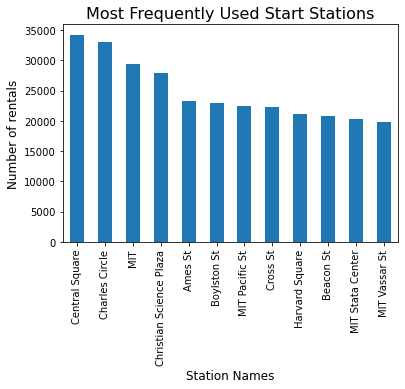

In [82]:
ax = df_all['start station id'].value_counts().sort_values(ascending=False)[:12].plot(kind="bar")
plt.xlabel('Station Names', fontsize=12)
plt.ylabel('Number of rentals', fontsize=12)

plt.title('Most Frequently Used Start Stations', fontsize=16)
ax.set_xticklabels(['Central Square','Charles Circle','MIT','Christian Science Plaza','Ames St','Boylston St','MIT Pacific St','Cross St','Harvard Square','Beacon St','MIT Stata Center', 'MIT Vassar St'], rotation='90');


The most frequently used stations are: Central Square, Charles Circle, MIT, Christian Science Plaza, Annes St, Boylston St, MIT Pacific St, Cross St, Harward Square, Beacon St, MIT Stata Center, MIT Vassar St.

In [83]:
# assess end station id column's 12 most frequent values in descending order
df_all['end station id'].value_counts().sort_values(ascending=False)[:12]


68     35158
60     33450
46     28040
67     27574
107    27111
342    22970
74     22725
47     21995
190    21604
11     21473
178    21351
53     20595
Name: end station id, dtype: int64

In [84]:
df_all.loc[df_all['end station id'] == 68, 'end station name']

165      Central Square at Mass Ave / Essex St
457      Central Square at Mass Ave / Essex St
483      Central Square at Mass Ave / Essex St
487      Central Square at Mass Ave / Essex St
542      Central Square at Mass Ave / Essex St
                         ...                  
73762    Central Square at Mass Ave / Essex St
73763    Central Square at Mass Ave / Essex St
73764    Central Square at Mass Ave / Essex St
73828    Central Square at Mass Ave / Essex St
73829    Central Square at Mass Ave / Essex St
Name: end station name, Length: 35158, dtype: object

In [85]:
df_all.loc[df_all['end station id'] == 60, 'end station name']

19       Charles Circle - Charles St at Cambridge St
203      Charles Circle - Charles St at Cambridge St
226      Charles Circle - Charles St at Cambridge St
311      Charles Circle - Charles St at Cambridge St
524      Charles Circle - Charles St at Cambridge St
                            ...                     
73723    Charles Circle - Charles St at Cambridge St
73801    Charles Circle - Charles St at Cambridge St
73848    Charles Circle - Charles St at Cambridge St
73964    Charles Circle - Charles St at Cambridge St
73965    Charles Circle - Charles St at Cambridge St
Name: end station name, Length: 33450, dtype: object

In [86]:
df_all.loc[df_all['end station id'] == 46, 'end station name']

51       Christian Science Plaza - Massachusetts Ave at...
149      Christian Science Plaza - Massachusetts Ave at...
150      Christian Science Plaza - Massachusetts Ave at...
151      Christian Science Plaza - Massachusetts Ave at...
154      Christian Science Plaza - Massachusetts Ave at...
                               ...                        
73506    Christian Science Plaza - Massachusetts Ave at...
73715    Christian Science Plaza - Massachusetts Ave at...
73736    Christian Science Plaza - Massachusetts Ave at...
73737    Christian Science Plaza - Massachusetts Ave at...
73909    Christian Science Plaza - Massachusetts Ave at...
Name: end station name, Length: 28040, dtype: object

In [87]:
df_all.loc[df_all['end station id'] == 67, 'end station name']

58       MIT at Mass Ave / Amherst St
291      MIT at Mass Ave / Amherst St
299      MIT at Mass Ave / Amherst St
317      MIT at Mass Ave / Amherst St
352      MIT at Mass Ave / Amherst St
                     ...             
73321    MIT at Mass Ave / Amherst St
73406    MIT at Mass Ave / Amherst St
73582    MIT at Mass Ave / Amherst St
73583    MIT at Mass Ave / Amherst St
73739    MIT at Mass Ave / Amherst St
Name: end station name, Length: 27574, dtype: object

In [88]:
df_all.loc[df_all['end station id'] == 107, 'end station name']

109      Ames St at Main St
115      Ames St at Main St
147      Ames St at Main St
148      Ames St at Main St
179      Ames St at Main St
                ...        
72850    Ames St at Main St
73049    Ames St at Main St
73226    Ames St at Main St
73706    Ames St at Main St
73710    Ames St at Main St
Name: end station name, Length: 27111, dtype: object

In [89]:
df_all.loc[df_all['end station id'] == 372, 'end station name']

108      Boylston St at Exeter St
269      Boylston St at Exeter St
359      Boylston St at Exeter St
371      Boylston St at Exeter St
417      Boylston St at Exeter St
                   ...           
73318    Boylston St at Exeter St
73523    Boylston St at Exeter St
73671    Boylston St at Exeter St
73696    Boylston St at Exeter St
73711    Boylston St at Exeter St
Name: end station name, Length: 10511, dtype: object

In [90]:
df_all.loc[df_all['end station id'] == 74, 'end station name']

248      Harvard Square at Mass Ave/ Dunster
288      Harvard Square at Mass Ave/ Dunster
378      Harvard Square at Mass Ave/ Dunster
453      Harvard Square at Mass Ave/ Dunster
454      Harvard Square at Mass Ave/ Dunster
                        ...                 
73161    Harvard Square at Mass Ave/ Dunster
73468    Harvard Square at Mass Ave/ Dunster
73729    Harvard Square at Mass Ave/ Dunster
73753    Harvard Square at Mass Ave/ Dunster
73873    Harvard Square at Mass Ave/ Dunster
Name: end station name, Length: 22725, dtype: object

In [91]:
df_all.loc[df_all['end station id'] == 47, 'end station name']

152      Cross St at Hanover St
162      Cross St at Hanover St
275      Cross St at Hanover St
308      Cross St at Hanover St
372      Cross St at Hanover St
                  ...          
73467    Cross St at Hanover St
73470    Cross St at Hanover St
73656    Cross St at Hanover St
73869    Cross St at Hanover St
73898    Cross St at Hanover St
Name: end station name, Length: 21995, dtype: object

In [92]:
df_all.loc[df_all['end station id'] == 190, 'end station name']

232      Nashua Street at Red Auerbach Way
305      Nashua Street at Red Auerbach Way
683      Nashua Street at Red Auerbach Way
684      Nashua Street at Red Auerbach Way
690      Nashua Street at Red Auerbach Way
                       ...                
73687    Nashua Street at Red Auerbach Way
73779    Nashua Street at Red Auerbach Way
73838    Nashua Street at Red Auerbach Way
73863    Nashua Street at Red Auerbach Way
73956    Nashua Street at Red Auerbach Way
Name: end station name, Length: 21604, dtype: object

In [93]:
df_all.loc[df_all['end station id'] == 11, 'end station name']

114      Longwood Ave at Binney St
116      Longwood Ave at Binney St
256      Longwood Ave at Binney St
272      Longwood Ave at Binney St
297      Longwood Ave at Binney St
                   ...            
72803    Longwood Ave at Binney St
73046    Longwood Ave at Binney St
73392    Longwood Ave at Binney St
73785    Longwood Ave at Binney St
73911    Longwood Ave at Binney St
Name: end station name, Length: 21473, dtype: object

In [94]:
df_all.loc[df_all['end station id'] == 178, 'end station name']

5        MIT Pacific St at Purrington St
61       MIT Pacific St at Purrington St
66       MIT Pacific St at Purrington St
67       MIT Pacific St at Purrington St
69       MIT Pacific St at Purrington St
                      ...               
73770    MIT Pacific St at Purrington St
73816    MIT Pacific St at Purrington St
73904    MIT Pacific St at Purrington St
73983    MIT Pacific St at Purrington St
73985    MIT Pacific St at Purrington St
Name: end station name, Length: 21351, dtype: object

In [95]:
df_all.loc[df_all['end station id'] == 53, 'end station name']

2015      Beacon St at Massachusetts Ave
2347      Beacon St at Massachusetts Ave
2669      Beacon St at Massachusetts Ave
2723      Beacon St at Massachusetts Ave
2762      Beacon St at Massachusetts Ave
                       ...              
100528    Beacon St at Massachusetts Ave
100582    Beacon St at Massachusetts Ave
100674    Beacon St at Massachusetts Ave
100708    Beacon St at Massachusetts Ave
100730    Beacon St at Massachusetts Ave
Name: end station name, Length: 20595, dtype: object

The most frequently used end stations are:

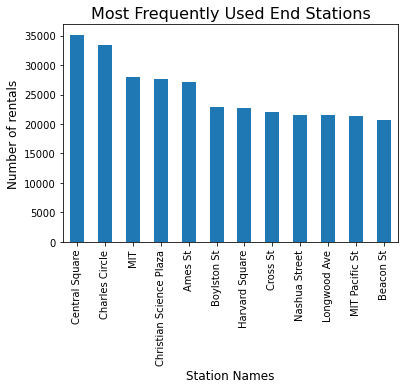

In [96]:
ax = df_all['end station id'].value_counts().sort_values(ascending=False)[:12].plot(kind="bar")
plt.xlabel('Station Names', fontsize=12)
plt.ylabel('Number of rentals', fontsize=12)

plt.title('Most Frequently Used End Stations', fontsize=16)
ax.set_xticklabels(['Central Square','Charles Circle','MIT','Christian Science Plaza','Ames St','Boylston St','Harvard Square','Cross St','Nashua Street','Longwood Ave', 'MIT Pacific St', 'Beacon St']);

The most frequently used stations are: Central Square, Charles Circle, MIT, Christian Science Plaza, Annes St - and until here, the most frequent start and end stations are identitical- Boylston St, Harward Square, Cross St, Nashua Street, Longwood Ave, Beacon St, MIT Pacific St, Beacon St.

Next, I will investigate which times of the day, days of the week and month of the year are the most popular between riders.

For this I would like to separate different times of the day and see the most frequent values in each time of the day.

In [97]:
# convert time of the day column to datetime format so I can index it later
df_all['timeoftheday'] = pandas.to_datetime(df_all['timeoftheday'])

In [98]:
# test if it's done
df_all.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
weekday                             int64
month                              object
timeoftheday               datetime64[ns]
type                               object
dtype: object

In [99]:
# index and separate evening, morning, afternoon as different times of the day
index = pandas.DatetimeIndex(df_all['timeoftheday'])
df_evening = df_all.iloc[index.indexer_between_time('20:00','05:00')]
df_morning = df_all.iloc[index.indexer_between_time('05:01','12:00')]
df_afternoon = df_all.iloc[index.indexer_between_time('12:01','19:59')]


In [100]:
#test
df_evening.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,weekday,month,timeoftheday,type
0,478,2020-01-01 00:04:05.809,2020-01-01 00:12:04.237,366,Broadway T Stop,42.342781,-71.057473,93,JFK/UMass T Stop,42.320340,-71.051180,6005,Customer,2,January,2021-02-11 00:04:00,Weekday
1,363,2020-01-01 00:04:45.699,2020-01-01 00:10:49.040,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3168,Subscriber,2,January,2021-02-11 00:04:00,Weekday
2,284,2020-01-01 00:06:07.063,2020-01-01 00:10:51.924,219,Boston East - 126 Border St,42.373312,-71.041020,212,Maverick Square - Lewis Mall,42.368844,-71.039778,3985,Subscriber,2,January,2021-02-11 00:06:00,Weekday
3,193,2020-01-01 00:06:13.855,2020-01-01 00:09:27.832,396,Main St at Beacon St,42.409330,-71.063819,387,Norman St at Kelvin St,42.409859,-71.066319,2692,Subscriber,2,January,2021-02-11 00:06:00,Weekday
4,428,2020-01-01 00:07:25.295,2020-01-01 00:14:33.780,60,Charles Circle - Charles St at Cambridge St,42.360793,-71.071190,49,Stuart St at Charles St,42.351146,-71.066289,4978,Subscriber,2,January,2021-02-11 00:07:00,Weekday


In [101]:
#test
df_morning.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,weekday,month,timeoftheday,type
234,1332,2020-01-01 05:15:08.162,2020-01-01 05:37:21.150,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,81,Chinatown T Stop,42.352409,-71.062679,3603,Subscriber,2,January,2021-02-11 05:15:00,Weekday
235,1197,2020-01-01 05:20:43.388,2020-01-01 05:40:40.978,378,191 Beacon St,42.380323,-71.108786,352,Ring Rd,42.348278,-71.080449,3080,Customer,2,January,2021-02-11 05:20:00,Weekday
236,675,2020-01-01 05:37:53.250,2020-01-01 05:49:08.287,441,Sullivan Square,42.384452,-71.075149,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,-71.048927,5418,Subscriber,2,January,2021-02-11 05:37:00,Weekday
237,642,2020-01-01 05:45:11.391,2020-01-01 05:55:53.992,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,15,Brighton Mills - 370 Western Ave,42.361546,-71.137762,5113,Customer,2,January,2021-02-11 05:45:00,Weekday
238,439,2020-01-01 05:51:22.733,2020-01-01 05:58:41.757,8,Union Square - Brighton Ave at Cambridge St,42.353334,-71.137313,17,Soldiers Field Park - 111 Western Ave,42.364263,-71.118276,4082,Subscriber,2,January,2021-02-11 05:51:00,Weekday


In [102]:
#test
df_afternoon.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,weekday,month,timeoftheday,type
534,373,2020-01-01 12:01:14.091,2020-01-01 12:07:27.133,116,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,5739,Subscriber,2,January,2021-02-11 12:01:00,Weekday
535,411,2020-01-01 12:01:39.840,2020-01-01 12:08:31.377,58,Mugar Way at Beacon St,42.355536,-71.072869,16,Back Bay T Stop - Dartmouth St at Stuart St,42.348074,-71.076570,5983,Subscriber,2,January,2021-02-11 12:01:00,Weekday
536,391,2020-01-01 12:01:52.744,2020-01-01 12:08:23.776,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,107,Ames St at Main St,42.362500,-71.088220,5312,Subscriber,2,January,2021-02-11 12:01:00,Weekday
537,757,2020-01-01 12:02:12.748,2020-01-01 12:14:50.457,149,175 N Harvard St,42.363796,-71.129164,351,Faneuil St at Arlington St,42.352766,-71.159885,5892,Subscriber,2,January,2021-02-11 12:02:00,Weekday
538,973,2020-01-01 12:02:29.504,2020-01-01 12:18:42.568,36,Copley Square - Dartmouth St at Boylston St,42.349928,-71.077392,121,W Broadway at Dorchester St,42.335959,-71.046229,3763,Subscriber,2,January,2021-02-11 12:02:00,Weekday


In [103]:
# check most frequent values in each dataframe for further exploration later
df_afternoon['timeoftheday'].value_counts().sort_values(ascending=False)

2021-02-11 17:08:00    3754
2021-02-11 17:11:00    3701
2021-02-11 17:15:00    3693
2021-02-11 17:10:00    3680
2021-02-11 17:20:00    3676
                       ... 
2021-02-11 19:58:00    1934
2021-02-11 12:04:00    1929
2021-02-11 12:02:00    1923
2021-02-11 19:57:00    1920
2021-02-11 12:01:00    1861
Name: timeoftheday, Length: 479, dtype: int64

In [104]:
# check most frequent values in each dataframe for further exploration later
df_evening['timeoftheday'].value_counts().sort_values(ascending=False)

2021-02-11 20:01:00    2005
2021-02-11 20:08:00    1992
2021-02-11 20:00:00    1989
2021-02-11 20:03:00    1950
2021-02-11 20:05:00    1942
                       ... 
2021-02-11 03:55:00      51
2021-02-11 03:01:00      50
2021-02-11 04:09:00      46
2021-02-11 04:01:00      45
2021-02-11 03:00:00      32
Name: timeoftheday, Length: 541, dtype: int64

In [105]:
# check most frequent values in each dataframe for further exploration later
df_morning['timeoftheday'].value_counts().sort_values(ascending=False)

2021-02-11 08:39:00    2119
2021-02-11 08:37:00    2068
2021-02-11 08:45:00    2056
2021-02-11 08:49:00    2030
2021-02-11 08:44:00    2026
                       ... 
2021-02-11 05:05:00     104
2021-02-11 05:01:00      99
2021-02-11 05:02:00      97
2021-02-11 05:04:00      89
2021-02-11 05:03:00      86
Name: timeoftheday, Length: 420, dtype: int64

In [106]:
# assess weekday column's 12 most frequent values in descending order
df_all['weekday'].value_counts()

5    338908
4    307958
6    293585
2    292558
1    286126
3    285525
0    268788
Name: weekday, dtype: int64

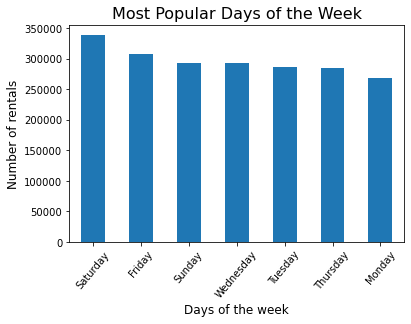

In [107]:
ax = df_all['weekday'].value_counts().plot(kind="bar")
plt.xlabel('Days of the week', fontsize=12)
plt.ylabel('Number of rentals', fontsize=12)

plt.title('Most Popular Days of the Week', fontsize=16)
ax.set_xticklabels(['Saturday','Friday','Sunday','Wednesday','Tuesday','Thursday','Monday'], rotation=50);

The most popular days of the week for the riders are Saturday, Frdiay, Sunday, Wednesday, Tuesday, Thursday and not surprisingly, Monday comes the last.

Next, I will check the most popular months of the year.

In [108]:
# assess month's column 12 most frequent values in descending order
df_all['month'].value_counts().sort_values(ascending=False)

September    307853
August       289033
July         259726
October      248424
June         191843
November     161712
February     133235
January      128598
May          124879
March        107350
December      74002
April         46793
Name: month, dtype: int64

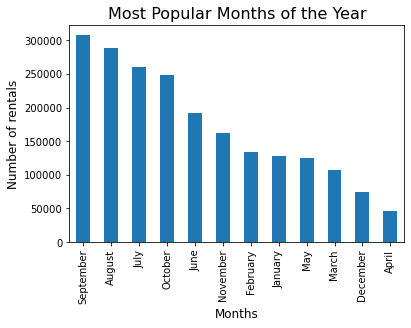

In [109]:
# plot the most popular months of the year
ax = df_all['month'].value_counts().plot(kind="bar")
ax.set_title('Most Popular Months of the Year', fontsize=16)
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Number of rentals', fontsize=12);

The most popular months of the year to ride a bike are: 

September, August, July, October, June, November

The least popular ones are:

April, December, March, May, January, February

## Bivariate Exploration

> In this section, I'll investigate relationships between pairs of variables in my data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).
-

- Relationship between weekday/weekend and start station 
- Duration and weekday/weekend



- When are the most trips taken in terms of time of day, day of the week, or month of the year?
- Does these depend on if a user is a subscriber or customer?
